# Ride Sharing Exploratory  Analysis

## Project description
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Description of the data
A database with info on taxi rides in Chicago:  
The files that contain the data are retrieved with queries.

##### project_sql_result_01.csv. 

It contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.

##### project_sql_result_04.csv

It contains the following data:

- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.

##### project_sql_result_01.csv

It contains the following data:

- start_ts: pickup date and time
- weather_conditions : weather conditions at the moment the ride started
- duration_seconds: ride duration in seconds


In [94]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from scipy import stats as st

In [79]:
#reading the dataset 
try:
    df_company = pd.read_csv('project_sql_result_01.csv')
    df2_dropoff = pd.read_csv('project_sql_result_04.csv')
    hypo = pd.read_csv('project_sql_result_07.csv')
except:
    df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
    df2_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
    hypo = pd.read_csv('/datasets/project_sql_result_07.csv')

#### Dataset 1
company_name: taxi company name

trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [40]:
#looking at the first 5 data in our dataset
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [41]:
df_company.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


The mean is larger than the median and we can say that the data is positively skewed.

In [42]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


There seems to be no missing data and data types seem to be correct.

#### Dataset 2

dropoff_location_name: Chicago neighborhoods where rides ended

average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [44]:
#checking out the first 5 rows of data
df2_dropoff.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [85]:
df2_dropoff.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


The mean is larger than the median and we can say that the data is positively skewed.

In [50]:
df2_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


There is no missing data and data types for average_trips need to be changes her to ints from floats. 

##### Dataset 3

In [82]:
hypo.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [84]:
hypo.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


The median is larger than the mean and we can say that the data is positively skewed.

In [87]:
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


There is no missing data and the data types seem to be correct.

## Data preprocessing

In [47]:
#checking if out first dataset has duplictaes
df_company.duplicated().sum()

0

In [88]:
#checking if out 2 dataset has duplictaes
df2_dropoff.duplicated().sum()

0

In [90]:
#checking if out 3 dataset has duplictaes
hypo.duplicated().sum() 

197

In [91]:
#droping duplicates and resetting the index
hypo1 = hypo.drop_duplicates().reset_index(drop=True)
# checking the sum of duplicates
hypo1.duplicated().sum()

0

In [92]:
# change the data types
df2_dropoff['average_trips'] = df2_dropoff['average_trips'].astype(int)

## Top 10 neighborhoods in terms of drop-offs

In [68]:
top_10_neighbor = df2_dropoff.nlargest(10,'average_trips')
top_10_neighbor

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


The neighborhood with the most drop-offs is Loop and River North. The least amount of drop-offs are Sheffield & DePaul.

## EDA

#### Graph:  top 10 neighborhoods by number of dropoffs

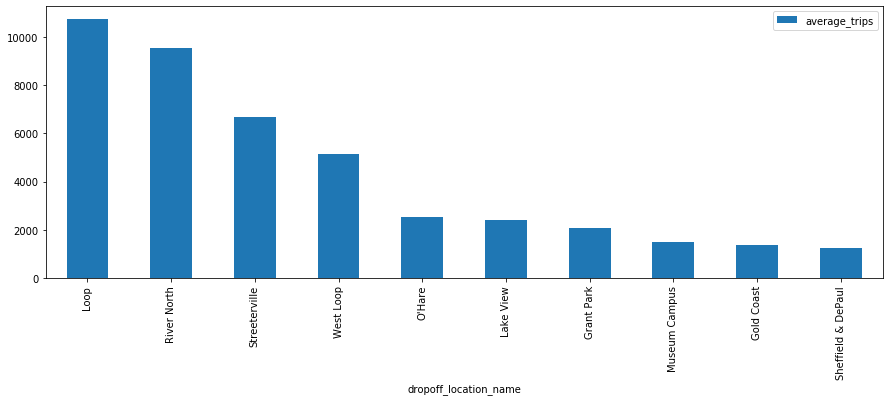

In [67]:
#histgraph of sales  by platform
ss = top_10_neighbor.pivot_table(index = 'dropoff_location_name', values = 'average_trips', aggfunc = 'sum').sort_values(
    'average_trips', ascending=False).plot(kind='bar',figsize=(15,5))


The top 10 neigbors are shown above and we can see that neighborhood: Loop, River North, Streeterville, and West Loop have the most average trips compared to the other drop off locations. 

#### Graph: taxi companies and number of rides

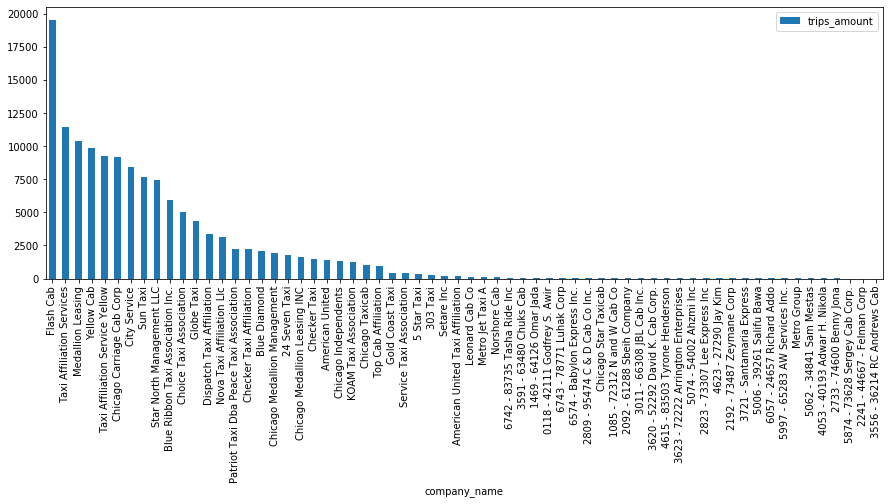

In [71]:
#histgraph of sales  by platform
taxi_ride = df_company.pivot_table(index = 'company_name', values = 'trips_amount', aggfunc = 'sum').sort_values(
    'trips_amount', ascending=False).plot(kind='bar',figsize=(15,5))


A company called 'Flash Cab' seems to have the most trip amounts.

In [73]:
#Looks at the top 10 company 
top_10_company = df_company.nlargest(10,'trips_amount')
top_10_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


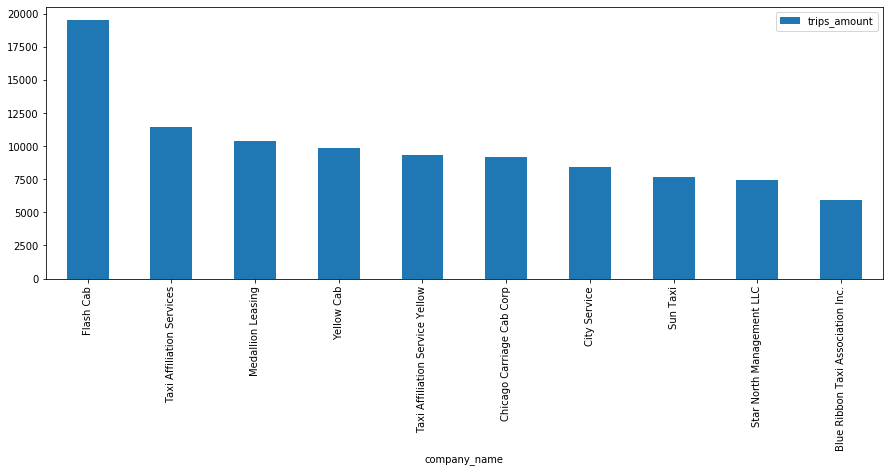

In [75]:
#histgraph of top 10 company
top_10_company1 = top_10_company.pivot_table(index = 'company_name', values = 'trips_amount', aggfunc = 'sum').sort_values(
    'trips_amount', ascending=False).plot(kind='bar',figsize=(15,5))


From further analysis we can see that Flash Cab is the company with the most trip amounts. The company with the least amount of trip amounts is Blue Ribbon Taxi Association Inc.

## Testing hypotheses

#### Hypothesis:

HO: The average duration of rides from the Loop to O'Hare International Airport stay the same on rainy Saturdays.

HA: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [93]:
# look at the dataset
hypo1.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


For computing the hypothesis we will use scipy.stats.ttest_ind() to test out the hypothesis. We use this test since we are testing whether two populations sample means are equal. In addition, for this test I will be setting my alpah level to 0.05.

In [97]:
s1 = hypo1[hypo1['weather_conditions'] == 'Good'].dropna()['duration_seconds']
s2 = hypo1[hypo1['weather_conditions'] == 'Bad'].dropna()['duration_seconds']
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(s1, s2, equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  7.397770692813604e-08
We reject the null hypothesis


From the hypothesis test we can go ahead and reject the null hypothesis since our a p-value of 7.39e^-0.8 is smaller than alpha. We can reject it in favor of alternative that the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Conclusion

The whole goal of the analysis was to find patterns in the available information. We wanted to use the infomation given to understand passenger preferences and the impact of external factors on rides. 

From working with a database, we have you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency. From the hypothesis we have found that weather does play a impact on rides and changes the duration of one. 

In addition, we found the top 10 neighborhoods by number of dropoffs.
    - Loop, River North, Streeterville, and West Loop have the most average trips compared to the other drop off locations. With Loop and River North being the neighborhood with the most amount of drop offs.
    
Also, we looked into the top 10 taxi company's and found Flash Cab to have the highest amount of trip amounts compared to all other companies.
